# Исследование объявлений о продаже квартир

**В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.**

**По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.**

# Описание данных

<span style="background-color: #D3D3D3">airports_nearest</span> — расстояние до ближайшего аэропорта в метрах (м)

<span style="background-color: #D3D3D3">balcony</span> — число балконов

<span style="background-color: #D3D3D3">ceiling_height</span> — высота потолков (м)

<span style="background-color: #D3D3D3">cityCenters_nearest</span> — расстояние до центра города (м)

<span style="background-color: #D3D3D3">days_exposition</span> — сколько дней было размещено объявление (от публикации до снятия)

<span style="background-color: #D3D3D3">first_day_exposition</span> — дата публикации

<span style="background-color: #D3D3D3">floor</span> — этаж

<span style="background-color: #D3D3D3">floors_total</span> — всего этажей в доме

<span style="background-color: #D3D3D3">is_apartment</span> — апартаменты (булев тип)

<span style="background-color: #D3D3D3">kitchen_area</span> — площадь кухни в квадратных метрах (м²)

<span style="background-color: #D3D3D3">last_price</span> — цена на момент снятия с публикации

<span style="background-color: #D3D3D3">living_area</span> — жилая площадь в квадратных метрах (м²)

<span style="background-color: #D3D3D3">locality_name</span> — название населённого пункта

<span style="background-color: #D3D3D3">open_plan</span> — свободная планировка (булев тип)

<span style="background-color: #D3D3D3">parks_around3000</span> — число парков в радиусе 3 км

<span style="background-color: #D3D3D3">parks_nearest</span> — расстояние до ближайшего парка (м)

<span style="background-color: #D3D3D3">ponds_around3000</span> — число водоёмов в радиусе 3 км

<span style="background-color: #D3D3D3">ponds_nearest</span> — расстояние до ближайшего водоёма (м)

<span style="background-color: #D3D3D3">rooms</span> — число комнат

<span style="background-color: #D3D3D3">studio</span> — квартира-студия (булев тип)

<span style="background-color: #D3D3D3">total_area</span> — общая площадь квартиры в квадратных метрах (м²)

<span style="background-color: #D3D3D3">total_images</span> — число фотографий квартиры в объявлении

##  Изучение общий информации по датасету. 

In [1]:
# импорт библиотеки pandas
import pandas as pd
# импорт библиотеки matplotlib
import matplotlib.pyplot as plt
# чтение файла с данными и сохранение в data
data = pd.read_csv('/datasets/real_estate_data.csv', sep ='\t',decimal='\t')



In [2]:
# получение первых 10 строк таблице
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
# выводим общую информацию о датафрейме
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

Text(0, 0.5, 'Количество объявлений')

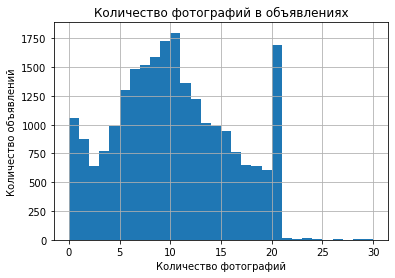

In [4]:
# гистограмма изображений в объявлениях
data['total_images'].hist(bins = 30, range =(0, 30))
plt.title('Количество фотографий в объявлениях')
plt.xlabel ('Количество фотографий')
plt.ylabel ('Количество объявлений')

**Количетсво изображений в объявлениях**

В среднем в объявлениях размещают с 5 по 10 фотографий, так же можно заметить выбивающий столбец с 20 фотографиями и присутвуют объявленияс 0 изображениями.

Text(0, 0.5, 'Количество объявлений')

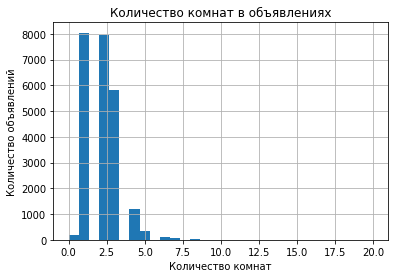

In [5]:
# гистограмма количетства комнат
data['rooms'].hist(bins = 30, range =(0, 20))
plt.title('Количество комнат в объявлениях')
plt.xlabel ('Количество комнат')
plt.ylabel ('Количество объявлений')

**Количетсво комнат**

В основном квартиры в объявлениях находятся в диапазоне одной двух или трёх комнат, есть несколько выбивающих значений больще 5 комнат.

Text(0, 0.5, 'Количетсво объявлений')

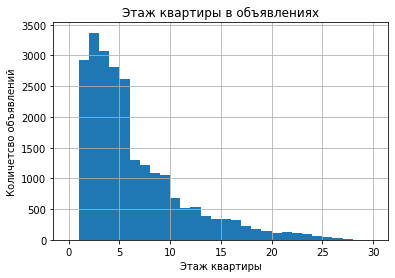

In [6]:
# гистограмма этажа на которой находится квартира
data['floor'].hist(bins = 30, range =(0, 30))
plt.title('Этаж квартиры в объявлениях')
plt.xlabel ('Этаж квартиры')
plt.ylabel ('Количетсво объявлений')


**Этаж квартиры**

Основная масса квартир в объявлениях находится на промежутки с 3 по 6 этаж.

**Вывод**

Из основной информации видно, что в данных присутствуют пропуски и некоторые из данных находятся не в том типе которые нужны для исследования.

Без обработки данных по графикам можно сказать что в объявлениях в среднем 5-10 фотографий , бОльшая часть квартир продается в промежутке с 3 по 6 этаж и имеют одну, две или три комнаты.

## Предобработка данных

In [7]:
# перевод данных на числа с плавующей точкой
dtype = ['last_price','total_area','ceiling_height','living_area','kitchen_area','balcony','airports_nearest','cityCenters_nearest','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest','days_exposition']
for i in dtype:
    data[i] = data[i].astype('float32')

In [8]:
# перевод данных на булевое значение
data['is_apartment'] = data['is_apartment'].astype('bool')

In [9]:
# перевод данных на временной тип данных
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [10]:
# подсчёт пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [11]:
# замена пропусков на значение 0
columns_to_replace = ['balcony','floors_total','ponds_around3000','parks_around3000']
for emptiness in columns_to_replace:
    data[emptiness] = data[emptiness].fillna(0)

In [12]:
# перевод данных на целое число
data['floors_total'] = data['floors_total'].astype('float')
data['floors_total'] = data['floors_total'].astype('int')

In [13]:
# замена пропусков на значение unknown
data['locality_name'] = data['locality_name'].fillna('unknown')

In [14]:
# замена пропусков на значение False
data['is_apartment'] = data['is_apartment'].fillna(False)

In [15]:
# замена пропусков столбца kitchen_area
kitchen_mean = data['kitchen_area'].mean() / data['total_area'].mean()
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_mean)

In [16]:
# замена пропусков столбца living_area
living_area_mean = data['living_area'].mean() / data['total_area'].mean()
data['living_area'] = data['living_area'].fillna(living_area_mean)

In [17]:
# замена пропусков столбца ceiling_height
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [18]:
# подсчёт явных дубликатов
data.duplicated().sum()

0

In [19]:
# проверка корректности замены пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [20]:
# замена буквы ё на е 
data['locality_name'] = data['locality_name'].str.replace('ё','е')

In [21]:
# замена буквы городской поселок на поселок городского типа
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')

In [22]:
# просмотр уникальных значений столбца ceiling_height
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [23]:
# замена выбивающихся значений 
data['ceiling_height'] = data['ceiling_height'].replace(14 , 1.4)
data['ceiling_height'] = data['ceiling_height'].replace(25 , 2.5)
data['ceiling_height'] = data['ceiling_height'].replace(32 , 3.2)
data['ceiling_height'] = data['ceiling_height'].replace(27 , 2.7)
data['ceiling_height'] = data['ceiling_height'].replace(24 , 2.4)
data['ceiling_height'] = data['ceiling_height'].replace(26 , 2.6)
data['ceiling_height'] = data['ceiling_height'].replace(20 , 2.0)
data['ceiling_height'] = data['ceiling_height'].replace(22.6 , 2.26)
data['ceiling_height'] = data['ceiling_height'].replace(27.5 , 2.75)
data['ceiling_height'] = data['ceiling_height'].replace(10.3 , 1.03)
data['ceiling_height'] = data['ceiling_height'].replace(100 , 10.0)


In [24]:
# убираем анамально большие значения в kitchen_area
data = data[data['kitchen_area'] < 50]

In [25]:
# убираем анамально большие значения в last_price
data = data[data['last_price'] < 15000000]

In [26]:
# убираем анамально большие значения в total_area
data = data[data['total_area'] < 200]

In [27]:
# убираем анамально большие и маленькие значения продажи квартиры
data = data[(data['days_exposition'] < 600) & (data['days_exposition'] > 7)]

**Причины появление пропусков:**
   
   В представленных данных причиной появления пропуск является как и человеческий фактор и сбой системы, например человек заполнявший анкету понимал, что поблизости нет водоёмов и просто решил пропустит эту графу, пример сбоя системы это отсутсвие значений в населеном пункте.

**Пояснение почему перевел тип данных:**

   Большинство данных в необработанном датафрейме представлялись как строки, но внутри находились значения с плавающей точкой, поэтому для комфортной работы с данными и чтобы не вызывать ошибок сделал перевод, по такому же принципу перевёд значение общего количетсва этажей на целые числа и значение даты публикацию в специальный тип временной тип.

**Особенности данных:** 
    
   В названиях насёлных пунктов много повторных занчений с разницой в одну букву или слово, так же есть анамально большие цены и площадь в данных.
   Так же в данных были слишком высокие потолки.

### Подсчет и добавление в таблицу новых столбцов

In [28]:
# добавляем новый столбец со стоимостью одного квадратного метра
data['price_for_meter'] = data['last_price']/data['total_area']

In [29]:
# добавляем новый столбец со значение дня недели публикации
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek

In [30]:
# добавляем новый столбец со значение месяца публикации
data['month_of_publication'] = data['first_day_exposition'].dt.month

In [31]:
# добавляем новый столбец со значением года публикации
data['year_of_publication'] = data['first_day_exposition'].dt.year

In [32]:
# добавляем столбец который определяем тип этажа квартиры
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(categorize_floor,axis=1)

In [33]:
# добавляем столбец который считает расстояние до центра города в километрах
data['distance_to_center'] = round(data['cityCenters_nearest']/1000)

**Вывод** 

Заполнены пропуски в данных, добавлены новые столбцы для проведения глубокого иссследовательского анализа, так же для корректного подсчета некоторые данные приведены к нужному типу.

Неявных дубликатов обнаружено не было, исправлены явные дубликаты и удалены анамальные значения

## Исследовательский анализ данных

Text(0, 0.5, 'Количество объявлений')

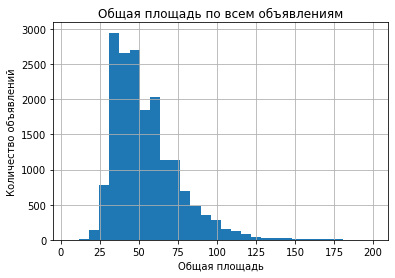

In [34]:
# строим гистограмму для общей площади
data['total_area'].hist(bins = 30, range = (5, 200))
plt.title('Общая площадь по всем объявлениям')
plt.xlabel ('Общая площадь')
plt.ylabel ('Количество объявлений')

**Общая площадь**

Основная часть квартир в объявлениях имет общую площадь от 25 до 100 квадратных метров

Text(0, 0.5, 'Количество объявлений')

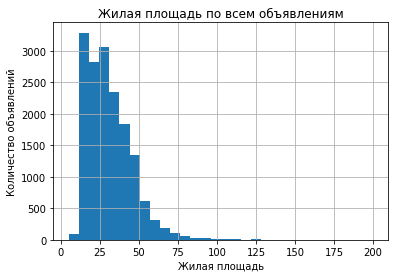

In [35]:
# строим гистограмму для жилой площади
data['living_area'].hist(bins = 30, range = (5,200))
plt.title('Жилая площадь по всем объявлениям')
plt.xlabel ('Жилая площадь')
plt.ylabel ('Количество объявлений')

**Жилая площадь**

Жилая площадь в объявлениях преобладает в промежутки от 15 до 50 квадратных метров

Text(0, 0.5, 'Количетсво объявлений')

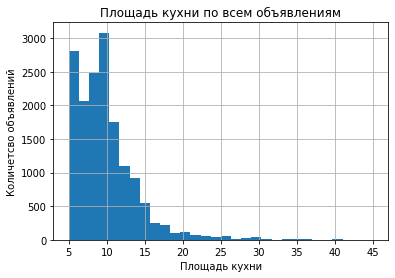

In [36]:
# строим гистограмму для площади кухни
data['kitchen_area'].hist(bins = 30, range = (5,45))
plt.title('Площадь кухни по всем объявлениям')
plt.xlabel ('Площадь кухни')
plt.ylabel ('Количетсво объявлений')

**Площадь кухни**

Большинство объявлений имеют площадь кухни до 15 квадратных метров

Text(0, 0.5, 'Количетсво объявлений')

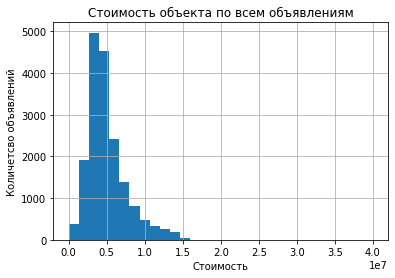

In [37]:
# строим гистограмму для цены объекта
data['last_price'].hist(bins = 30, range = (0,40000000))
plt.title('Стоимость объекта по всем объявлениям')
plt.xlabel ('Стоимость')
plt.ylabel ('Количетсво объявлений')

**Цена объекта**

Основная цена на квартиры находится в районе 5 миллионов рублей.

Text(0, 0.5, 'Количетсво объявлений')

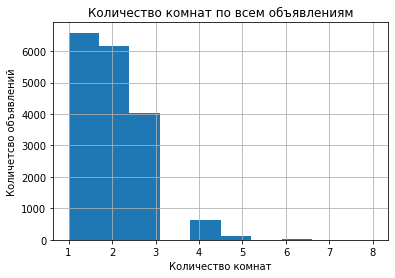

In [38]:
# строим гистограмму для количества комнат
data['rooms'].hist(bins = 10,range = (1,8))
plt.title('Количество комнат по всем объявлениям')
plt.xlabel ('Количество комнат')
plt.ylabel ('Количетсво объявлений')

**Количество комнат**

На рынке объявлений большую часть занимают квартиры с одному, двумя или тремя комнатами.

Text(0, 0.5, 'Количетсво объявлений')

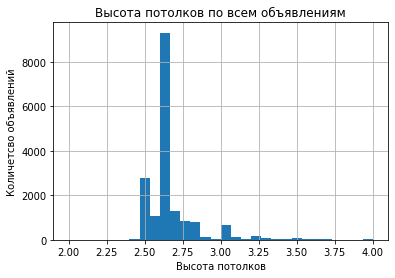

In [39]:
# строим гистограмму для высоты потолков
data['ceiling_height'].hist(bins = 30,range = (2,4))
plt.title('Высота потолков по всем объявлениям')
plt.xlabel ('Высота потолков')
plt.ylabel ('Количетсво объявлений')

**Высота потолков**

Показатель высоты потолков в основном находится в районе 2.5 до 3 метров

Text(0, 0.5, 'Количетсво объявлений')

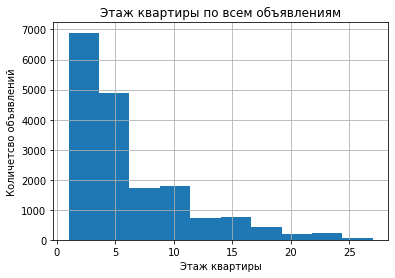

In [40]:
# строим гистограмму для этажа квартиры
data['floor'].hist(range=(1,27))
plt.title('Этаж квартиры по всем объявлениям')
plt.xlabel ('Этаж квартиры')
plt.ylabel ('Количетсво объявлений')

**Этаж квартры** 

В объявление преобладают квартиры до 10 этажа

Text(0, 0.5, 'Количетсво объявлений')

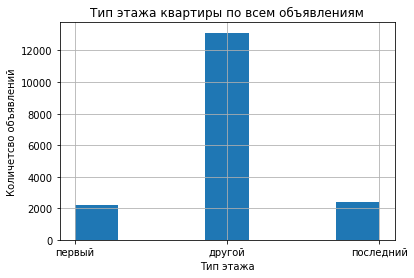

In [41]:
# строим гистограмму для типа этажа квартиры
data['floor_type'].hist(bins = 7)
plt.title('Тип этажа квартиры по всем объявлениям')
plt.xlabel ('Тип этажа')
plt.ylabel ('Количетсво объявлений')

**Тип этажей**

Объявление где тип этажей другой забрал бОльшую часть, первый и последний не так часто встречаются 

Text(0, 0.5, 'Количетсво объявлений')

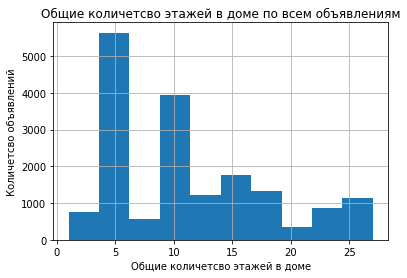

In [42]:
# строим гистограмму для общего количетсва этажей в доме
data['floors_total'].hist(range=(1,27))
plt.title('Общие количетсво этажей в доме по всем объявлениям')
plt.xlabel ('Общие количетсво этажей в доме')
plt.ylabel ('Количетсво объявлений')

**Общее количетсво этажей**

пятиэтажные и десятиэтажные дома основной костяк среди прочих объявлений.

Text(0, 0.5, 'Количетсво объявлений')

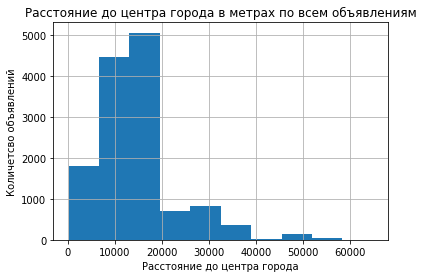

In [43]:
# строим гистограмму для расстояния до центра города в метрах
data['cityCenters_nearest'].hist()
plt.title('Расстояние до центра города в метрах по всем объявлениям')
plt.xlabel ('Расстояние до центра города')
plt.ylabel ('Количетсво объявлений')

**Расстояние до центра города**

В основном квартиры находятся от 7500 до 20 000 метров от центра города

Text(0, 0.5, 'Количетсво объявлений')

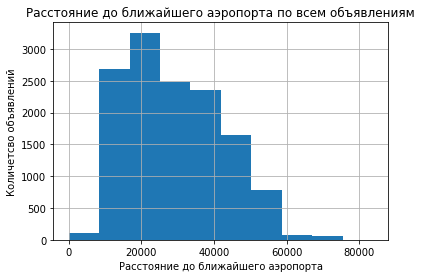

In [44]:
# строим гистограмму для расстояние до ближайшего аэропорта
data['airports_nearest'].hist()
plt.title('Расстояние до ближайшего аэропорта по всем объявлениям')
plt.xlabel ('Расстояние до ближайшего аэропорта')
plt.ylabel ('Количетсво объявлений')

**Расстояние до ближайшего аэропорта**

В основном квартиры находятся от 10 000 до 40 000 метров до аэропорта.

Text(0, 0.5, 'Количетсво объявлений')

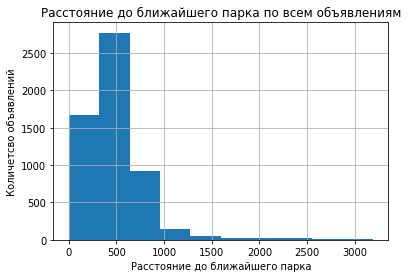

In [45]:
# строим гистограмму для расстояние до ближайшего парка
data['parks_nearest'].hist()
plt.title('Расстояние до ближайшего парка по всем объявлениям')
plt.xlabel ('Расстояние до ближайшего парка')
plt.ylabel ('Количетсво объявлений')

**Расстояние до ближайшего парка**

В основном квартиры находятся от 400 до 600 метров до ближайшего парка.

Text(0, 0.5, 'Количетсво объявлений')

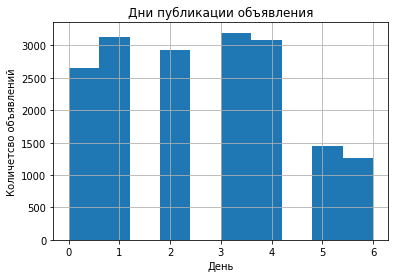

In [46]:
# строим гистограмму дня публикации объявления 
data['day_of_week'].hist()
plt.title('Дни публикации объявления')
plt.xlabel ('День')
plt.ylabel ('Количетсво объявлений')

**День публикации**

Клиенты в большинстве случаев выставляют объявление в будние дни.

Text(0, 0.5, 'Количетсво объявлений')

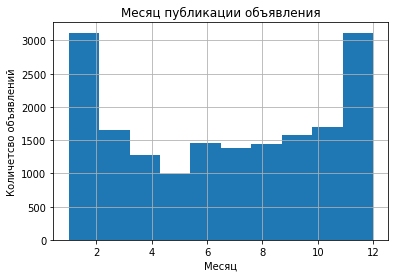

In [47]:
# строим гистограмму месяца публикации объявления
data['month_of_publication'].hist()
plt.title('Месяц публикации объявления')
plt.xlabel ('Месяц')
plt.ylabel ('Количетсво объявлений')

**Месяц публикации**

В конце и начале года люди активнее выставляют объявление, но к середине этот наплыв уменьшается.

Text(0, 0.5, 'Количетсво объявлений')

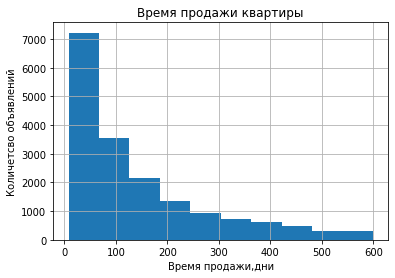

In [48]:
# строим гистограмму времени продажи
data['days_exposition'].hist()
plt.title('Время продажи квартиры')
plt.xlabel ('Время продажи,дни')
plt.ylabel ('Количетсво объявлений')

In [49]:
# смотрим среднее и медианное время прожад
data['days_exposition'].describe()

count    17702.000000
mean       142.784149
std        135.337036
min          8.000000
25%         45.000000
50%         91.000000
75%        198.000000
max        599.000000
Name: days_exposition, dtype: float64

**Время продажи квартиры**

Среднее количетсво дней необходимое для продажи является 142 дней.Медианное значение 91 дня.
В основном квартиры продаются за 100 дней.Быстрой продажей можно на звать 50 дней.

Text(0, 0.5, 'Стоимость')

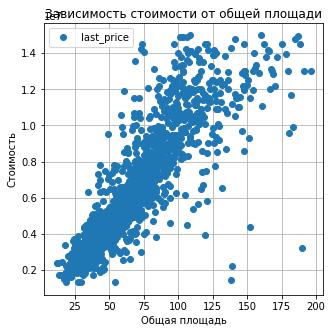

In [50]:
# гистограмма зависимости цены от общей площади
data.pivot_table(
    index='total_area', values='last_price').plot(grid = True, figsize = (5,5),style = 'o')
plt.title('Зависимость стоимости от общей площади')
plt.xlabel ('Общая площадь')
plt.ylabel ('Стоимость')

**Зависимость стоимости от общей площади**

Как видно зависимость присутсвует чем больше площадь, тем выше цены.

Text(0, 0.5, 'Стоимость')

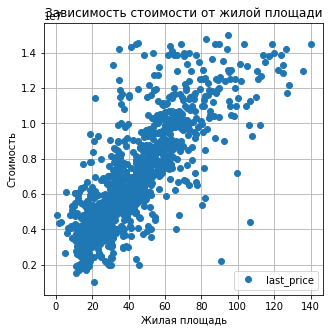

In [51]:
# гистограмма зависимости цены от жилой площади
data.pivot_table(
    index='living_area', values='last_price').plot(grid = True, figsize = (5,5),style = 'o')
plt.title('Зависимость стоимости от жилой площади')
plt.xlabel ('Жилая площадь')
plt.ylabel ('Стоимость')

**Зависимость стоимости от жилой площади**

Как видно зависимость присутсвует чем больше жилая площадь тем выше цены, что в целом логично.

Text(0, 0.5, 'Стоимость')

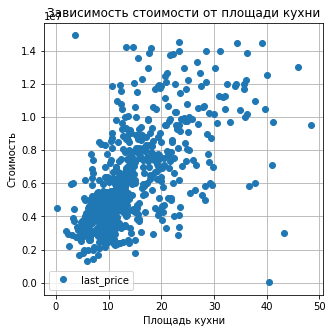

In [52]:
# гистограмма зависимости цены от площади кухни
data.pivot_table(
    index='kitchen_area', values='last_price').plot(grid = True, figsize = (5,5),style = 'o')
plt.title('Зависимость стоимости от площади кухни')
plt.xlabel ('Площадь кухни')
plt.ylabel ('Стоимость')

**Зависимость стоимости от  площади кухни**

Опять же видно что с ростов площади кухни цена растет, но так же заметно что после отметки в 30 квадратных метров зависимость начинает пропадать немного

Text(0, 0.5, 'Стоимость')

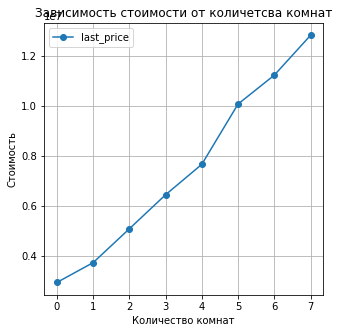

In [53]:
# гистограмма зависимости цены от количетсва комнат
data.pivot_table(
    index='rooms', values='last_price').plot(grid = True, figsize = (5,5),style = 'o-')
plt.title('Зависимость стоимости от количетсва комнат')
plt.xlabel ('Количество комнат')
plt.ylabel ('Стоимость')

**Зависимость стоимости от количетсва комнат**

С ростов количетсва комнат растёт и цена.

Text(0, 0.5, 'Стоимость')

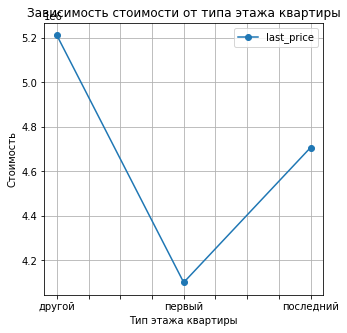

In [54]:
# гистограмма зависимости цены от типа этажа квартиры
data.pivot_table(
    index='floor_type', values='last_price').plot(grid = True, figsize = (5,5),style = 'o-',)
plt.title('Зависимость стоимости от типа этажа квартиры')
plt.xlabel ('Тип этажа квартиры')
plt.ylabel ('Стоимость')

**Зависимость стоимости от  типа этажа**

Клиенты меньше всего предпочитают квартиры с первого этажа, последний этаж квартиры не так сильно пугает клиентов, большая часть предпочтут что то между первым и последнем.

Text(0, 0.5, 'Стоимость')

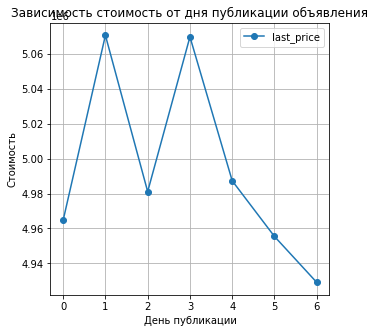

In [55]:
# гистограмма зависимости цены от дня публикации объявления
data.pivot_table(
    index='day_of_week', values='last_price').plot(grid = True, figsize = (5,5),style = 'o-',)
plt.title('Зависимость стоимость от дня публикации объявления')
plt.xlabel ('День публикации')
plt.ylabel ('Стоимость')

**Зависимость стоимости от  дня публикации**

Публикации в будни имеют высокую цену нежели публикации в выходные дни, по графику заметна тенденция снижение цены к концу неделе.

Text(0, 0.5, 'Стоимость')

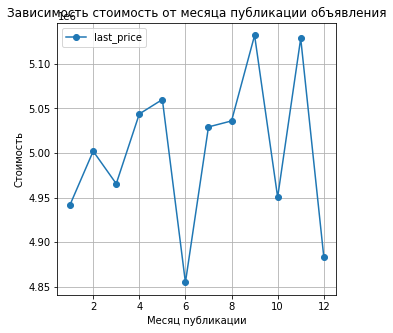

In [56]:
# гистограмма зависимости цены от месяца публикации
data.pivot_table(
    index='month_of_publication', values='last_price').plot(grid = True, figsize = (5,5),style = 'o-',)
plt.title('Зависимость стоимость от месяца публикации объявления')
plt.xlabel ('Месяц публикации')
plt.ylabel ('Стоимость')

**Зависимость стоимости от месяца публикации**

Самые низкие цены в начале лета и конце года, самые высокие появляются осенью.

Text(0, 0.5, 'Стоимость')

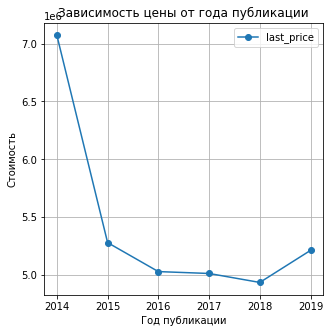

In [57]:
# гистограмма зависимости цены от года публикации
data.pivot_table(
    index='year_of_publication', values='last_price').plot(grid = True, figsize = (5,5),style = 'o-',)
plt.title('Зависимость цены от года публикации')
plt.xlabel ('Год публикации')
plt.ylabel ('Стоимость')

**Зависимость стоимости от года публикации**

По графику видно что цена на квартиры падал до 2018 года после чего начался небольшой рост.

In [58]:
# средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
count_locality = data['locality_name'].value_counts().head(10)
top_locality = data.query('locality_name in @count_locality.index')
top_locality.pivot_table(
    index='locality_name', values='price_for_meter', aggfunc = 'mean').sort_values(by = 'price_for_meter', ascending = False)


,price_for_meter
locality_name,
Санкт-Петербург,105691.921875
Пушкин,99209.507812
деревня Кудрово,92627.078125
поселок Парголово,88965.593750
поселок Мурино,85918.226562
поселок Шушары,78044.273438
Колпино,74456.671875
Гатчина,67999.898438
Всеволожск,66980.054688


In [59]:
# населенные пункты с высокой и низкой стоимостью квадратного метра
count_locality = data['locality_name'].value_counts()
low_locality = data.query('locality_name in @count_locality.index')
low_locality.pivot_table(
    index='locality_name', values='price_for_meter', aggfunc = 'mean').sort_values(by = 'price_for_meter', ascending = False)

,price_for_meter
locality_name,
поселок Лисий Нос,113728.351562
Санкт-Петербург,105691.921875
Зеленогорск,100701.781250
Сестрорецк,99940.664062
Пушкин,99209.507812
...,...
поселок Совхозный,12629.128906
деревня Выскатка,12335.480469
деревня Вахнова Кара,11688.311523


Text(0, 0.5, 'Стоимость')

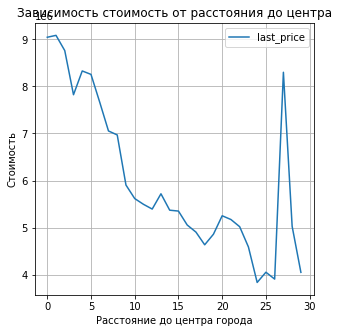

In [60]:
# гистограмма зависимости от расстояния до центра города
data.query('locality_name == "Санкт-Петербург"').pivot_table( index = 'distance_to_center', values = 'last_price').plot(grid = True, figsize = (5,5),style = '-',)
plt.title('Зависимость стоимость от расстояния до центра')
plt.xlabel ('Расстояние до центра города')
plt.ylabel ('Стоимость')


**Зависимость стоимости от расстояния до центра**

Чем дальше от центра тем меньше цена, возможное появление выброса это элитный посёлок.

## Общий вывод

**Факторы влияющие на стоимость квартиры.**

- На стоимость жилья сильно влияет общая площадь жилой и кухни.
- Так же можно увидеть, что с увиличение количетсво комант тоже происходит рост цен, но не так сильно как площадь жилья.
- Квартиры находящиеся на первом этаже имеют самую маленькую стоимость чего нельзя сказать о квартирах на других этажах.
- Можно увидеть что цена падает от начала недели и под конец снижается до минимума
- Минимальные цены появляются в середине года летом, максимальные цены же появлются весной и осенью.
- с 2014 года стоимость квартир значительно упала, но к 2019 появился снова рост цен.

**Сроки продажи**

В основном люди продают кваритру за 100 дней, быстрой продажей можно считать 45-50 дней, 230 дней уже дможно считать долгой продажей.

**Стоимость квадратного метра в 10 самых поплулярных мест**
- Самый дорогой квадратный метр у Санкт-Петербурга и состоявляет он 107123.43
- Самый дешёвый у Выборга 57932.87

**Самый дорогой и дешёвый квадратный метр**
- Дорогой принадлежит Санкт-Петербургу и состоявляет он 107123.43
- Дешевый принадлежит деревня Старополье 11206.22

**Зависимость цены квартиры в Санкт-Петербугре**
- Зависимость такова что, чем ближе квартира к центру, тем она дороже.